In [1]:
from sklearn.linear_model import LinearRegression
from jupyterthemes import jtplot
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil import parser
import seaborn as sns
from scipy.stats import norm
from scipy.stats import genextreme as gev
from scipy.stats import pareto 
from scipy import stats
import geopandas as gpd
from shapely.geometry import Point
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
jtplot.style()

Can't load requested DLL: C:\Program Files\GeoDa Software\ogr_FileGDB.dll
126: The specified module could not be found.

Can't load requested DLL: C:\Program Files\GeoDa Software\ogr_FileGDB.dll
126: The specified module could not be found.

Can't load requested DLL: C:\Program Files\GeoDa Software\ogr_MSSQLSpatial.dll
126: The specified module could not be found.

Can't load requested DLL: C:\Program Files\GeoDa Software\ogr_MSSQLSpatial.dll
126: The specified module could not be found.

Can't load requested DLL: C:\Program Files\GeoDa Software\ogr_OCI.dll
126: The specified module could not be found.

Can't load requested DLL: C:\Program Files\GeoDa Software\ogr_OCI.dll
126: The specified module could not be found.

Can't load requested DLL: C:\Program Files\GeoDa Software\ogr_PG.dll
126: The specified module could not be found.

Can't load requested DLL: C:\Program Files\GeoDa Software\ogr_PG.dll
126: The specified module could not be found.

Can't load requested DLL: C:\Program Fil

In [2]:
sftax = pd.read_csv('C:/Users/Rohan/Documents/NYU/PUI/Assessor_Historical_Secured_Property_Tax_Rolls.csv',\
                usecols=['Closed Roll Year', 'Property Location', 'Parcel Number', 'Block',
       'Lot', 'Year Property Built', 'Number of Bathrooms', 'Number of Bedrooms',
       'Number of Rooms', 'Number of Stories', 'Number of Units',
       'Zoning Code', 'Construction Type', 'Lot Depth', 'Lot Frontage',
       'Property Area', 'Basement Area', 'Lot Area', 
       'Tax Rate Area Code', 'Percent of Ownership', 'Homeowner Exemption Value', 'Current Sales Date',
       'Assessed Fixtures Value', 'Assessed Improvement Value',
       'Assessed Land Value', 'Assessed Personal Property Value',
       'the_geom', 'Row ID']); sftax.head()

,Closed Roll Year,Property Location,Parcel Number,Block,Lot,Year Property Built,Number of Bathrooms,Number of Bedrooms,Number of Rooms,Number of Stories,...,Tax Rate Area Code,Percent of Ownership,Homeowner Exemption Value,Current Sales Date,Assessed Fixtures Value,Assessed Improvement Value,Assessed Land Value,Assessed Personal Property Value,the_geom,Row ID
0,2012,0000 0000 0000,9999065,9999,065,NaN,0.0,0,0.0,0.0,...,1.0,1.0,0.0,2012/01/01,0,0,0,2351,NaN,20129999065
1,2013,0000 0000 0000,9999189,9999,189,NaN,0.0,0,0.0,0.0,...,1.0,1.0,0.0,2013/01/01,0,0,0,1505,NaN,20139999189
2,2007,0000 0000 0000,9999129,9999,129,NaN,0.0,0,0.0,0.0,...,511.0,1.0,0.0,2008/01/01,0,0,0,0,NaN,20079999129
3,2014,0000 0000 0000,9999178,9999,178,NaN,0.0,0,0.0,0.0,...,1.0,1.0,0.0,2014/01/01,0,0,0,27976,NaN,20149999178
4,2008,0000 0000 0000,9999132,9999,132,NaN,0.0,0,0.0,0.0,...,1014.0,1.0,0.0,2008/01/01,0,0,0,0,NaN,20089999132


In [20]:
sftax.isna().sum().sort_values(ascending = False)

Current Sales Date                  1128959
Construction Type                    462245
Zoning Code                          400029
Year Property Built                  208669
Tax Rate Area Code                     6948
the_geom                               2126
Homeowner Exemption Value                61
Basement Area                            28
Number of Stories                        11
Number of Rooms                          11
Lot                                       1
Percent of Ownership                      1
Assessed Fixtures Value                   0
Assessed Improvement Value                0
Assessed Land Value                       0
Assessed Personal Property Value          0
Closed Roll Year                          0
Lot Frontage                              0
Lot Area                                  0
Property Area                             0
Property Location                         0
Lot Depth                                 0
Number of Units                 

In [12]:
sftax_num = sftax.select_dtypes(include = [np.number])
sftax_num_cols = sftax_num.columns.values
print(sftax_num_cols)

['Closed Roll Year' 'Year Property Built' 'Number of Bathrooms'
 'Number of Bedrooms' 'Number of Rooms' 'Number of Stories'
 'Number of Units' 'Lot Depth' 'Lot Frontage' 'Property Area'
 'Basement Area' 'Lot Area' 'Tax Rate Area Code' 'Percent of Ownership'
 'Homeowner Exemption Value' 'Assessed Fixtures Value'
 'Assessed Improvement Value' 'Assessed Land Value'
 'Assessed Personal Property Value']


In [15]:
sftax_nonnum = sftax.select_dtypes(exclude = [np.number])
sftax_nonnum_cols = sftax_nonnum.columns.values
print(sftax_nonnum_cols)

['Property Location' 'Parcel Number' 'Block' 'Lot' 'Zoning Code'
 'Construction Type' 'Current Sales Date' 'the_geom' 'Row ID']


In [14]:
sftax_num.describe()

,Closed Roll Year,Year Property Built,Number of Bathrooms,Number of Bedrooms,Number of Rooms,Number of Stories,Number of Units,Lot Depth,Lot Frontage,Property Area,Basement Area,Lot Area,Tax Rate Area Code,Percent of Ownership,Homeowner Exemption Value,Assessed Fixtures Value,Assessed Improvement Value,Assessed Land Value,Assessed Personal Property Value
count,2.666117e+06,2.457448e+06,2.666117e+06,2.666117e+06,2.666106e+06,2.666106e+06,2.666117e+06,2.666117e+06,2.666117e+06,2.666117e+06,2.666089e+06,2.666117e+06,2.659169e+06,2.666116e+06,2.666056e+06,2.666117e+06,2.666117e+06,2.666117e+06,2.666117e+06
mean,2.013091e+03,1.941598e+03,2.367246e+00,1.098908e+00,7.801704e+00,1.489746e+00,1.833681e+00,8.601254e+00,7.134318e-02,2.923800e+03,6.150585e+01,3.893195e+03,1.000556e+03,9.170984e-01,3.105888e+03,7.420120e+03,4.368968e+05,4.339636e+05,4.568982e+03
std,3.745280e+00,3.316393e+01,8.678265e+00,1.076614e+01,2.369903e+01,7.116920e+00,1.541899e+01,2.172836e+01,3.030150e+00,2.006235e+04,3.393634e+02,1.365115e+05,2.195576e+01,1.317667e+01,3.575309e+03,7.630177e+05,4.717296e+06,2.591251e+06,3.870753e+05
min,2.007000e+03,1.791000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.010000e+03,1.914000e+03,1.000000e+00,0.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+03,0.000000e+00,0.000000e+00,1.000000e+03,1.000000e+00,0.000000e+00,0.000000e+00,8.529700e+04,5.485500e+04,0.000000e+00
50%,2.013000e+03,1.936000e+03,2.000000e+00,0.000000e+00,6.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.413000e+03,0.000000e+00,2.495000e+03,1.000000e+03,1.000000e+00,0.000000e+00,0.000000e+00,1.955370e+05,2.096340e+05,0.000000e+00
75%,2.016000e+03,1.962000e+03,2.000000e+00,2.000000e+00,8.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.240000e+03,0.000000e+00,3.000000e+03,1.000000e+03,1.000000e+00,7.000000e+03,0.000000e+00,3.498780e+05,4.361380e+05,0.000000e+00
max,2.019000e+03,2.020000e+03,1.002000e+03,3.800000e+03,3.606000e+03,9.990000e+02,4.000000e+03,9.996000e+01,1.600000e+03,4.701100e+06,5.557000e+04,5.800145e+07,9.000000e+03,6.005000e+03,6.300000e+04,6.084663e+08,1.750000e+09,6.071487e+08,1.540441e+08


In [56]:
#sanityindex = (sftax['Number of Bathrooms'] > 0) & (sftax['Number of Bathrooms'] < )
sftax['Number of Bedrooms'].value_counts()

0      1760663
2       306814
3       233883
1       140127
4       126417
        ...   
96           2
232          1
583          1
43           1
107          1
Name: Number of Bedrooms, Length: 117, dtype: int64

In [57]:
np.set_printoptions(suppress = True)
#print(sftax['Number of Bathrooms'].unique())
sftax['Number of Bathrooms'].value_counts()

1.0      989512
2.0      774501
0.0      332551
3.0      265546
4.0      123525
          ...  
448.0         2
237.0         1
533.0         1
213.0         1
277.0         1
Name: Number of Bathrooms, Length: 223, dtype: int64

In [51]:
#sftax['Number of Bathrooms'].unique()
#sftax.loc[sftax['Number of Bathrooms'] == sftax['Number of Bathrooms'].max()]
sftax['Number of Bedrooms'].unique()

array([   0,    3,    2,    6,    4,    1,   30,    7,    5,    9,   31,
         12,   16,   92,   34,   19,    8,   24,   11,   14,   25,   23,
         15,   54,   20,   10,   26,   17,  313,   18,   36,  136,   13,
         38,   41,   22,   48,   66,  400,  102,   85,   72,   27,  126,
        529,   49,   75,   57,   21,   51,  115,  160,   33,   42,  101,
         39,   40,  220,   60,   80,   37,   52,   44,   74,   28,   73,
         35,  201,   55,   87,   32,   50,   46,   59,  104,  234,   90,
        146,  137,  145, 3800,   84,   53,  112,  157,   62,   88,  135,
        624,   81,  140,   76,  158,  129,  232,   78,  272,  205,  221,
         61,  377,  259,  316,  999,   29,  105,  228,   77,  433,  254,
         64, 2065,   99,   96,  583,   43,  107], dtype=int64)

In [48]:
sftax['Closed Roll Year'].unique()

array([2012, 2013, 2007, 2014, 2008, 2010, 2009, 2017, 2019, 2015, 2018,
       2016, 2011], dtype=int64)

In [58]:
sftax_2013 = sftax.loc[sftax['Closed Roll Year'] >= 2013]; (sftax.shape, sftax_2013.shape)

((2666117, 28), (1466332, 28))

In [61]:
sftax_2013.head()

,Closed Roll Year,Property Location,Parcel Number,Block,Lot,Year Property Built,Number of Bathrooms,Number of Bedrooms,Number of Rooms,Number of Stories,...,Tax Rate Area Code,Percent of Ownership,Homeowner Exemption Value,Current Sales Date,Assessed Fixtures Value,Assessed Improvement Value,Assessed Land Value,Assessed Personal Property Value,the_geom,Row ID
1,2013,0000 0000 0000,9999189,9999,189,NaN,0.0,0,0.0,0.0,...,1.0,1.0,0.0,2013/01/01,0,0,0,1505,NaN,20139999189
3,2014,0000 0000 0000,9999178,9999,178,NaN,0.0,0,0.0,0.0,...,1.0,1.0,0.0,2014/01/01,0,0,0,27976,NaN,20149999178
11,2017,0000 0555 04TH ST-124,3776124Z,3776,124Z,NaN,0.0,0,0.0,0.0,...,NaN,1.0,0.0,NaN,0,18158,21219,0,NaN,20173776124Z
14,2019,0000 0050 ELGIN PK0000,3502143,3502,143,1913.0,2.0,3,6.0,2.0,...,1000.0,1.0,0.0,NaN,0,0,0,0,NaN,20193502143
17,2015,0000 0555 04TH STP-19,3776019Z,3776,019Z,NaN,0.0,0,0.0,0.0,...,NaN,1.0,0.0,NaN,0,26650,10659,0,NaN,20153776019Z


In [96]:
(sftax_2013.duplicated(subset = 'Parcel Number').sum())/len(sftax_2013)

0.8529268951369813

In [147]:
#(len(sftax_2013.loc[sftax_2013['Number of Bedrooms'] == 0]), len(sftax_2013.loc[sftax_2013['Number of Rooms'] == 0]))
#highest_zero_cols = list(((sftax_2013 == 0).sum(axis = 0)/len(sftax_2013)).sort_values(ascending = False)[:7].index)
((sftax_2013 == 0).sum(axis = 0)/len(sftax_2013)).sort_values(ascending = False)

Lot Area                      0.296950
Number of Units               0.205937
Number of Stories             0.195736
Number of Rooms               0.147445
Number of Bathrooms           0.120175
Property Area                 0.082061
Assessed Improvement Value    0.044341
Assessed Land Value           0.029374
Percent of Ownership          0.005598
the_geom                      0.000000
Tax Rate Area Code            0.000000
Closed Roll Year              0.000000
Property Location             0.000000
Year Property Built           0.000000
Lot                           0.000000
Block                         0.000000
Parcel Number                 0.000000
Row ID                        0.000000
dtype: float64

In [90]:
#sftax_2013.loc[sftax_2013['Assessed Land Value'] == sftax_2013['Assessed Land Value'].quantile(0.5)]
sftax_2013.loc[sftax_2013['Parcel Number'] == '0438A043'][['Closed Roll Year','Assessed Land Value']]

,Closed Roll Year,Assessed Land Value
196469,2016,239000
424433,2017,243780
1617767,2013,229756
1822383,2014,230799
2050228,2015,235410
2279398,2018,248655
2462260,2019,253628


<AxesSubplot:>

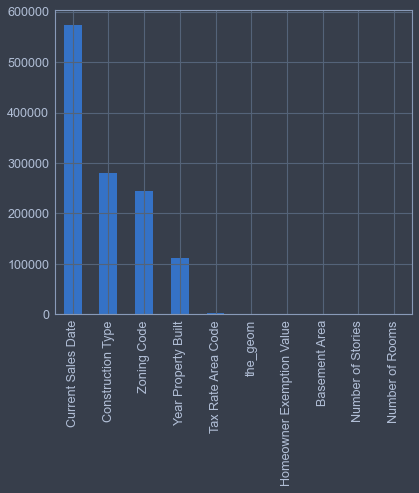

In [97]:
sftax_2013.isna().sum().sort_values(ascending = False)[:10].plot(kind = 'bar')

In [122]:
sftax_2013.drop(labels = ['Current Sales Date','Construction Type','Zoning Code'], axis = 'columns', inplace = True)
sftax_2013.drop(labels = highest_zero_cols, axis = 'columns', inplace = True)
sftax_2013.columns

Index(['Closed Roll Year', 'Property Location', 'Parcel Number', 'Block',
       'Lot', 'Year Property Built', 'Number of Bathrooms', 'Number of Rooms',
       'Number of Stories', 'Number of Units', 'Property Area', 'Lot Area',
       'Tax Rate Area Code', 'Percent of Ownership',
       'Assessed Improvement Value', 'Assessed Land Value', 'the_geom',
       'Row ID'],
      dtype='object')

In [146]:
#sftax_2013['Assessed Land Value'].mode()
sftax_2013[~(sftax_2013['Assessed Land Value'] == 0)]['Assessed Land Value'].describe()

count    1.423260e+06
mean     5.202798e+05
std      3.035655e+06
min      1.000000e+00
25%      8.121400e+04
50%      2.653020e+05
75%      5.061280e+05
max      6.071487e+08
Name: Assessed Land Value, dtype: float64

In [148]:
sftax_2013[~(sftax_2013['Property Area'] == 0)]['Property Area'].describe()

count    1.346004e+06
mean     3.190907e+03
std      1.934799e+04
min      1.000000e+00
25%      1.110000e+03
50%      1.503000e+03
75%      2.351000e+03
max      3.015837e+06
Name: Property Area, dtype: float64

In [150]:
sftax_2013_regs = sftax_2013.loc[:,['Closed Roll Year','Parcel Number','Year Property Built','Number of Rooms',
                                  'Property Area','Assessed Land Value', 'the_geom']]; sftax_2013_regs.head()

,Closed Roll Year,Parcel Number,Year Property Built,Number of Rooms,Property Area,Assessed Land Value,the_geom
1,2013,9999189,NaN,0.0,0,0,NaN
3,2014,9999178,NaN,0.0,0,0,NaN
11,2017,3776124Z,NaN,0.0,0,21219,NaN
14,2019,3502143,1913.0,6.0,1598,0,NaN
17,2015,3776019Z,NaN,0.0,0,10659,NaN


In [162]:
(sftax_2013_regs.isna().sum())/len(sftax_2013_regs)
#sftax_2013_regs = sftax_2013_regs.dropna(axis = 0, subset=['Year Property Built','the_geom', 'Number of Rooms'])

Closed Roll Year       0.0
Parcel Number          0.0
Year Property Built    0.0
Number of Rooms        0.0
Property Area          0.0
Assessed Land Value    0.0
the_geom               0.0
dtype: float64

In [168]:
#((sftax_2013_regs == 0).sum(axis = 0)/len(sftax_2013_regs)).sort_values(ascending = False)
sanityIndex = (sftax_2013_regs['Number of Rooms'] > 0) & (sftax_2013_regs['Property Area'] > 0) & \
(sftax_2013_regs['Assessed Land Value'] > 0)
sftax_2013_regs = sftax_2013_regs[sanityIndex]
sftax_2013_regs[['Assessed Land Value', 'Number of Rooms', 'Property Area']].describe()

,Assessed Land Value,Number of Rooms,Property Area
count,1.223882e+06,1.223882e+06,1.223882e+06
mean,4.644050e+05,8.842933e+00,2.785349e+03
std,1.781268e+06,2.120998e+01,1.345953e+04
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,9.565200e+04,5.000000e+00,1.148000e+03
50%,2.755560e+05,6.000000e+00,1.554000e+03
75%,5.187780e+05,8.000000e+00,2.430000e+03
max,4.397660e+08,3.606000e+03,3.015837e+06


In [211]:
outlierIndex = (sftax_2013_regs['Assessed Land Value'] > sftax_2013_regs['Assessed Land Value'].quantile(0.001)) & \
(sftax_2013_regs['Assessed Land Value'] < sftax_2013_regs['Assessed Land Value'].quantile(0.999)) & \
(sftax_2013_regs['Property Area'] > sftax_2013_regs['Property Area'].quantile(0.001)) & \
(sftax_2013_regs['Property Area'] < sftax_2013_regs['Property Area'].quantile(0.999)) & \
(sftax_2013_regs['Number of Rooms'] < sftax_2013_regs['Number of Rooms'].quantile(0.999)) & \
(sftax_2013_regs['Year Property Built'] > sftax_2013_regs['Year Property Built'].quantile(0.00001))

sftax_2013_regs = sftax_2013_regs[outlierIndex]
sftax_2013_regs.describe()

,Closed Roll Year,Year Property Built,Number of Rooms,Property Area,Assessed Land Value
count,1.213444e+06,1.213444e+06,1.213444e+06,1.213444e+06,1.213444e+06
mean,2.016031e+03,1.939691e+03,8.146237e+00,2.349230e+03,4.148424e+05
std,2.001122e+00,3.157215e+01,8.330562e+00,3.119684e+03,5.552872e+05
min,2.013000e+03,1.849000e+03,1.000000e+00,3.110000e+02,1.166400e+04
25%,2.014000e+03,1.914000e+03,5.000000e+00,1.150000e+03,9.599575e+04
50%,2.016000e+03,1.932000e+03,6.000000e+00,1.552000e+03,2.755360e+05
75%,2.018000e+03,1.958000e+03,8.000000e+00,2.415000e+03,5.155320e+05
max,2.019000e+03,2.020000e+03,1.290000e+02,5.715900e+04,8.032500e+06


In [213]:
APN_point_estimate_regs = sftax_2013_regs.groupby(by = 'Parcel Number', as_index = False).agg({
    'Year Property Built':'median',
    'Number of Rooms':'median',
    'Property Area':'median',
    'Assessed Land Value':'median'
});
APN_point_estimate_regs.head()

,Parcel Number,Year Property Built,Number of Rooms,Property Area,Assessed Land Value
0,0012002,1921.0,9.0,6841.0,2240417.0
1,0012003,1948.0,5.0,6800.0,1456749.0
2,0012005,1948.0,2.0,4000.0,1372735.0
3,0012006,1948.0,1.0,3500.0,1201141.0
4,0012007,1986.0,2.0,2500.0,989570.0


In [214]:
len(APN_point_estimate_regs[APN_point_estimate_regs['Year Property Built'] >= 2013])

4314

In [217]:
APN_point_estimate_regs.to_csv('C:/Users/Rohan/Documents/NYU/PUI/SFPermitTimes/Data/APNTaxData.csv')